In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib_venn import venn2
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn import metrics, tree, model_selection
from sklearn.impute import SimpleImputer


from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.tree import export_graphviz


## Data Collection


In [12]:
df1 = pd.read_csv('2016_-_Citywide_GHG_Emissions_20240207.csv')
df2 = pd.read_csv('2017_-_Cities_Community_Wide_Emissions.csv')

## Cleaning  emission datset

checking the first 10 raws

In [15]:
df1.head(10)

,Account Number,City Name,Country,City Short Name,C40,Reporting Year,Measurement Year,Boundary,Primary Methodology,Methodology Details,...,Current Population,City GDP,GDP Currency,Year of GDP,GDP Source,Average annual temperature (in Celsius)​,​Land area (in square km),Average altitude (m),City Location,Country Location
0,35894,Ville de Montreal,Canada,Montreal,NaN,2016,12/31/2009 12:00:00 AM,Other: The regional entity that constitutes th...,2006 IPCC Guidelines for National Greenhouse G...,2006 IPCC Guidelines for National Greenhouse G...,...,1886481.0,1.201180e+11,CAD Canadian Dollar,2014.0,"Ville de Montréal, Montréal en statistiques, h...",6.8,500.0,17.0,"(45.5086699, -73.5539925)","(56.130366, -106.346771)"
1,35898,Greater Manchester,United Kingdom,Manchester,NaN,2016,12/31/2013 12:00:00 AM,A metropolitan area,Global Protocol for Community-Scale Greenhouse...,A GPC Compliant dataset has been established f...,...,2762000.0,8.777300e+10,NaN,2013.0,UK ONS (using 1.56 USD/GBP) Figures provided i...,9.5,1277.0,250.0,"(53.4575955, -2.1578377)","(55.378051, -3.435973)"
2,54128,City of Reno,USA,Reno,NaN,2016,12/31/2014 12:00:00 AM,Administrative boundary of a local government,Global Protocol for Community-Scale Greenhouse...,Also utilized the U.S. Community Protocol for ...,...,236995.0,1.000000e+10,USD US Dollar,2014.0,Bureau of Economic Analysis10.4,10.4,288.0,1373.0,"(39.5296, -119.8138)","(37.09024, -95.712891)"
3,35879,City of Minneapolis,USA,Minneapolis,NaN,2016,12/31/2014 12:00:00 AM,Administrative boundary of a local government,U.S. Community Protocol for Accounting and Rep...,A note regarding how double counting is avoide...,...,407207.0,2.357000e+11,USD US Dollar,2014.0,http://www.bea.gov/iTable/iTable.cfm?reqid=70&...,7.9,139.8,264.0,"(44.983334, -93.26667)","(37.09024, -95.712891)"
4,50558,"City of London, ON",Canada,"London, ON",NaN,2016,12/31/2014 12:00:00 AM,Administrative boundary of a local government,International Emissions Analysis Protocol (ICLEI),as adapted by ICLEI Canada for use in the FCM'...,...,375000.0,1.540000e+10,CAD Canadian Dollar,2014.0,"Conference Board of Canada, London Census Metr...",7.9,421.0,251.0,"(42.9837, -81.2497)","(56.130366, -106.346771)"
5,54520,Ville de Lausanne,Switzerland,Lausanne,NaN,2016,12/31/2013 12:00:00 AM,Administrative boundary of a local government,Other,Baseline Emission Inventory of the Covenant of...,...,140000.0,8.834000e+09,NaN,2014.0,calculated by city government,12.0,55.0,500.0,"(46.5198, 6.6335)","(46.818188, 8.227512)"
6,43910,City of Columbus,USA,Columbus,NaN,2016,12/31/2015 12:00:00 AM,Administrative boundary of a local government,Global Protocol for Community-Scale Greenhouse...,Basic Reporting.,...,835957.0,1.080890e+11,USD US Dollar,2014.0,https://development.ohio.gov/files/research/E1...,11.6,563.0,275.0,"(39.9611755, -82.9987942)","(37.09024, -95.712891)"
7,50220,Métropole Nice Côte d'Azur,France,Nice Côte d'Azur,NaN,2016,12/31/2010 12:00:00 AM,A metropolitan area,Other,Bilan Carbone,...,550000.0,NaN,NaN,NaN,NaN,NaN,1400.0,18.0,"(43.710173, 7.261953)","(46.227638, 2.213749)"
8,44182,Incheon Metropolitan City,South Korea,Incheon,NaN,2016,12/31/2015 12:00:00 AM,Administrative boundary of a local government,Other,Calculation Korea Environment Corporation muni...,...,2983484.0,6.837300e+13,KRW South Korean Won,2014.0,KOSIS,12.7,1381.0,26.0,"(37.456256, 126.705206)","(35.907757, 127.766922)"
9,3203,City of Chicago,USA,Chicago,C40,2016,12/31/2010 12:00:00 AM,Administrative boundary of a local government,Other,Chicago conducts regional GHG emissions invent...,...,2719000.0,5.631880e+11,NaN,2014.0,Brookings Institution,9.4,606.0,181.0,"(41.8781136, -87.6297982)","(37.09024, -95.712891)"


listing the columns names

In [17]:
df1.shape

(187, 27)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Account Number                                  187 non-null    int64  
 1   City Name                                       187 non-null    object 
 2   Country                                         187 non-null    object 
 3   City Short Name                                 187 non-null    object 
 4   C40                                             54 non-null     object 
 5   Reporting Year                                  187 non-null    int64  
 6   Measurement Year                                187 non-null    object 
 7   Boundary                                        187 non-null    object 
 8   Primary Methodology                             187 non-null    object 
 9   Methodology Details                        

In [19]:
df2.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Account number                                229 non-null    int64  
 1   Organization                                  229 non-null    object 
 2   City                                          229 non-null    object 
 3   Country                                       229 non-null    object 
 4   Region                                        229 non-null    object 
 5   C40                                           56 non-null     object 
 6   Access                                        229 non-null    object 
 7   Reporting year                                229 non-null    int64  
 8   Accounting year                               229 non-null    object 
 9   Boundary                                      229 non-null    obj

In [20]:
df2.head()

,Account number,Organization,City,Country,Region,C40,Access,Reporting year,Accounting year,Boundary,...,Population year,GDP,GDP Currency,GDP Year,GDP Source,Average annual temperature (in Celsius)​,​Average altitude (m),​Land area (in square km),City Location,Country Location
0,49363,Nelson Mandela Bay Municipality,Nelson Mandela Bay,South Africa,Africa,NaN,Public,2017,2013-07-01 - 2014-06-30,A metropolitan area,...,2011,5.214700e+04,ZAR South African Rand,2010.0,Built Environment Performance Plan(BEPP),17.5,69.0,1950.0,"(-33.745241, 25.568108)","(-30.559482, 22.937506)"
1,31171,Ayuntamiento de Madrid,Madrid,Spain,Europe,C40,Public,2017,2014-01-01 - 2014-12-31,Administrative boundary of a local government,...,2016,1.293780e+11,EUR Euro,2015.0,Contabilidad Municipal Trimestral. Ciudad de M...,15.0,655.0,604.0,"(40.1076253, -3.3875673)","(40.463667, -3.74922)"
2,3417,New York City,New York City,USA,North America,C40,Public,2017,2015-01-01 - 2015-12-31,Administrative boundary of a local government,...,2016,1.558520e+12,USD US Dollar,2015.0,http://www.brookings.edu/research/reports2/201...,13.0,10.0,784.0,"(40.7127837, -74.0059413)","(37.09024, -95.712891)"
3,59537,"City of Denton, TX","Denton, TX",USA,North America,NaN,Public,2017,2015-01-01 - 2015-12-31,Administrative boundary of a local government,...,2015,NaN,NaN,NaN,NaN,18.2,192.0,227.8,"(33.214841, -97.133068)","(37.09024, -95.712891)"
4,35894,Ville de Montreal,Montreal,Canada,North America,C40,Public,2017,2013-01-01 - 2013-12-31,A metropolitan area,...,2013,1.154128e+08,CAD Canadian Dollar,2013.0,Institut de la statistique du Québec,6.8,17.0,500.0,"(45.5086699, -73.5539925)","(56.130366, -106.346771)"


number of raws and columns

### Checking for missing values in df1, we conclude there are several missing values in our dataset ,and we need to fill them by the mean or the mode depends on what dataType

In [23]:
missing_values = df1.isnull().sum()
missing_values

Account Number                                      0
City Name                                           0
Country                                             0
City Short Name                                     0
C40                                               133
Reporting Year                                      0
Measurement Year                                    0
Boundary                                            0
Primary Methodology                                 0
Methodology Details                                54
Gases included                                      6
Total City-wide Emissions (metric tonnes CO2e)      0
Total Scope 1 Emissions (metric tonnes CO2e)       53
Total Scope 2 Emissions (metric tonnes CO2e)       55
Increase/Decrease from last year                   21
Reason for increase/decrease in emissions          43
Current Population Year                             0
Current Population                                  2
City GDP                    

Checking for missing values in d2

In [25]:
df2.shape

(229, 31)

In [26]:
missing_values = df2.isnull().sum()
missing_values

Account number                                    0
Organization                                      0
City                                              0
Country                                           0
Region                                            0
C40                                             173
Access                                            0
Reporting year                                    0
Accounting year                                   0
Boundary                                          0
Protocol                                          0
Protocol column                                  78
Gases included                                  118
Total emissions (metric tonnes CO2e)             12
Scopes Included                                   0
Total Scope 1 Emissions (metric tonnes CO2e)     56
Total Scope 2 Emissions (metric tonnes CO2e)     57
Comment                                         150
Increase/Decrease from last year                 20
Reason for i

### filling the missing data with mean, since there are many missing values 

In [28]:

df2['C40'] = df2['C40'].fillna('No')
df2['Protocol column'] = df2['Protocol column'].fillna(df2['Protocol column'].mode()[0])
df2['Gases included'] = df2['Gases included'].fillna('Not specified')
df2['Total emissions (metric tonnes CO2e)'] = df2['Total emissions (metric tonnes CO2e)'].fillna(df2['Total emissions (metric tonnes CO2e)'].mean())
df2['Total Scope 1 Emissions (metric tonnes CO2e)'] = df2['Total Scope 1 Emissions (metric tonnes CO2e)'].fillna(df2['Total Scope 1 Emissions (metric tonnes CO2e)'].mean())
df2['Total Scope 2 Emissions (metric tonnes CO2e)'] = df2['Total Scope 2 Emissions (metric tonnes CO2e)'].fillna(df2['Total Scope 2 Emissions (metric tonnes CO2e)'].mean())
df2['Comment'] = df2['Comment'].fillna('No comment')
df2['Increase/Decrease from last year'] = df2['Increase/Decrease from last year'].fillna(df2['Increase/Decrease from last year'].mode()[0])
df2['Reason for increase/decrease in emissions'] = df2['Reason for increase/decrease in emissions'].fillna('Not specified')
df2['GDP'] = df2['GDP'].fillna(df2['GDP'].mean())
df2['GDP Currency'] = df2['GDP Currency'].fillna(df2['GDP Currency'].mode()[0])
df2['GDP Year'] = df2['GDP Year'].fillna(df2['GDP Year'].mode()[0])
df2['GDP Source'] = df2['GDP Source'].fillna('Not specified')
# Fill missing values by directly assigning the result back to the DataFrame
df2.columns = df2.columns.str.replace(r'\u200b', '', regex=True).str.strip()

df2['Average annual temperature (in Celsius)'] = df2['Average annual temperature (in Celsius)'].fillna(df2['Average annual temperature (in Celsius)'].mean())
df2['Average altitude (m)'] = df2['Average altitude (m)'].fillna(df2['Average altitude (m)'].mean())
df2['Land area (in square km)'] = df2['Land area (in square km)'].fillna(df2['Land area (in square km)'].mean())
# Fill missing values in 'Population' with the mean of the 'Population' column
df2['Population'] = df2['Population'].fillna(df2['Population'].mean())





###  this removes any whitespeace or invisble characters

In [30]:
missing_values = df2.isnull().sum()
missing_values

Account number                                  0
Organization                                    0
City                                            0
Country                                         0
Region                                          0
C40                                             0
Access                                          0
Reporting year                                  0
Accounting year                                 0
Boundary                                        0
Protocol                                        0
Protocol column                                 0
Gases included                                  0
Total emissions (metric tonnes CO2e)            0
Scopes Included                                 0
Total Scope 1 Emissions (metric tonnes CO2e)    0
Total Scope 2 Emissions (metric tonnes CO2e)    0
Comment                                         0
Increase/Decrease from last year                0
Reason for increase/decrease in emissions       0


filling the missing values 

In [32]:
# Fill missing values in df1

df1['C40'] = df1['C40'].fillna('No')
df1['Methodology Details'] = df1['Methodology Details'].fillna(df1['Methodology Details'].mode()[0])
df1['Gases included'] = df1['Gases included'].fillna('Not specified')
df1['Total City-wide Emissions (metric tonnes CO2e)'] = df1['Total City-wide Emissions (metric tonnes CO2e)'].fillna(df1['Total City-wide Emissions (metric tonnes CO2e)'].mean())
df1['Total Scope 1 Emissions (metric tonnes CO2e)'] = df1['Total Scope 1 Emissions (metric tonnes CO2e)'].fillna(df1['Total Scope 1 Emissions (metric tonnes CO2e)'].mean())
df1['Total Scope 2 Emissions (metric tonnes CO2e)'] = df1['Total Scope 2 Emissions (metric tonnes CO2e)'].fillna(df1['Total Scope 2 Emissions (metric tonnes CO2e)'].mean())
df1['Increase/Decrease from last year'] = df1['Increase/Decrease from last year'].fillna(df1['Increase/Decrease from last year'].mode()[0])
df1['Reason for increase/decrease in emissions'] = df1['Reason for increase/decrease in emissions'].fillna('Not specified')
df1['City GDP'] = df1['City GDP'].fillna(df1['City GDP'].mean())
df1['GDP Currency'] = df1['GDP Currency'].fillna(df1['GDP Currency'].mode()[0])
df1['Year of GDP'] = df1['Year of GDP'].fillna(df1['Year of GDP'].mode()[0])
df1['GDP Source'] = df1['GDP Source'].fillna('Not specified')
# Strip whitespace and special characters from column names
df1.columns = df1.columns.str.strip().str.replace('\u200b', '', regex=True) 


df1['Average annual temperature (in Celsius)'] = df1['Average annual temperature (in Celsius)'].fillna(df1['Average annual temperature (in Celsius)'].mean())
df1['Average altitude (m)'] = df1['Average altitude (m)'].fillna(df1['Average altitude (m)'].mean())
df1['Land area (in square km)'] = df1['Land area (in square km)'].fillna(df1['Land area (in square km)'].mean())
# Fill missing values in 'Population' with the mean of the 'Population' column
df1['Current Population'] = df1['Current Population'].fillna(df1['Current Population'].mean())


# Display the updated DataFrame to check for any remaining missing values
print(df1.isnull().sum())




Account Number                                    0
City Name                                         0
Country                                           0
City Short Name                                   0
C40                                               0
Reporting Year                                    0
Measurement Year                                  0
Boundary                                          0
Primary Methodology                               0
Methodology Details                               0
Gases included                                    0
Total City-wide Emissions (metric tonnes CO2e)    0
Total Scope 1 Emissions (metric tonnes CO2e)      0
Total Scope 2 Emissions (metric tonnes CO2e)      0
Increase/Decrease from last year                  0
Reason for increase/decrease in emissions         0
Current Population Year                           0
Current Population                                0
City GDP                                          0
GDP Currency

In [33]:
df1.columns = df1.columns.str.strip().str.replace('\u200b', '', regex=True)
df2.columns = df2.columns.str.strip().str.replace('\u200b', '', regex=True)

### combining the 2 dataset together and choosing the the columns that are necessary for our analyze 

In [35]:
df1_cleaned = df1[['City Name', 'Country', 'Reporting Year', 'Primary Methodology','C40',
                    'Total City-wide Emissions (metric tonnes CO2e)', 
                    'Total Scope 1 Emissions (metric tonnes CO2e)', 
                    'Total Scope 2 Emissions (metric tonnes CO2e)', 
                    'Current Population', 'City GDP', 
                    'Average annual temperature (in Celsius)', 
                    'Land area (in square km)', 'Average altitude (m)']]

df2_cleaned = df2[['City', 'Country', 'Reporting year','C40',
                    'Total emissions (metric tonnes CO2e)', 
                    'Total Scope 1 Emissions (metric tonnes CO2e)', 
                    'Total Scope 2 Emissions (metric tonnes CO2e)', 
                    'Population', 'GDP', 
                    'Average annual temperature (in Celsius)', 
                    'Average altitude (m)', 
                    'Land area (in square km)']]

In [36]:
df1_cleaned.rename(columns={
    'City Name': 'City',
    'Reporting Year': 'Reporting year',
    'Total City-wide Emissions (metric tonnes CO2e)': 'Total emissions (metric tonnes CO2e)',
    'Current Population': 'Population',
    'City GDP': 'GDP',
}, inplace=True)

# Combine the datasets using concat
combined_df = pd.concat([df1_cleaned, df2_cleaned], ignore_index=True)



/var/folders/j7/94zy_frx1x140zy804y4pfl00000gn/T/ipykernel_86093/4137037704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned.rename(columns={


In [37]:
combined_df.head()

,City,Country,Reporting year,Primary Methodology,C40,Total emissions (metric tonnes CO2e),Total Scope 1 Emissions (metric tonnes CO2e),Total Scope 2 Emissions (metric tonnes CO2e),Population,GDP,Average annual temperature (in Celsius),Land area (in square km),Average altitude (m)
0,Ville de Montreal,Canada,2016,2006 IPCC Guidelines for National Greenhouse G...,No,13722942.0,1.363433e+07,8.861100e+04,1886481.0,1.201180e+11,6.8,500.0,17.0
1,Greater Manchester,United Kingdom,2016,Global Protocol for Community-Scale Greenhouse...,No,14889318.0,3.396055e+08,5.302028e+06,2762000.0,8.777300e+10,9.5,1277.0,250.0
2,City of Reno,USA,2016,Global Protocol for Community-Scale Greenhouse...,No,4437665.0,3.396055e+08,1.126221e+08,236995.0,1.000000e+10,10.4,288.0,1373.0
3,City of Minneapolis,USA,2016,U.S. Community Protocol for Accounting and Rep...,No,4794708.0,2.890572e+06,1.904136e+06,407207.0,2.357000e+11,7.9,139.8,264.0
4,"City of London, ON",Canada,2016,International Emissions Analysis Protocol (ICLEI),No,3070000.0,2.771000e+06,2.990000e+05,375000.0,1.540000e+10,7.9,421.0,251.0


In [38]:
combined_df.shape


(416, 13)

In [39]:
combined_df.columns

Index(['City', 'Country', 'Reporting year', 'Primary Methodology', 'C40',
       'Total emissions (metric tonnes CO2e)',
       'Total Scope 1 Emissions (metric tonnes CO2e)',
       'Total Scope 2 Emissions (metric tonnes CO2e)', 'Population', 'GDP',
       'Average annual temperature (in Celsius)', 'Land area (in square km)',
       'Average altitude (m)'],
      dtype='object')

In [40]:
null_counts = combined_df.isnull().sum()
print(null_counts)

City                                              0
Country                                           0
Reporting year                                    0
Primary Methodology                             229
C40                                               0
Total emissions (metric tonnes CO2e)              0
Total Scope 1 Emissions (metric tonnes CO2e)      0
Total Scope 2 Emissions (metric tonnes CO2e)      0
Population                                        0
GDP                                               0
Average annual temperature (in Celsius)           0
Land area (in square km)                          0
Average altitude (m)                              0
dtype: int64


We can conclude that missing values have been identified and handled based on the data types:

- For **numerical columns** (such as `Population`, `Percentage reduction target`, and `Baseline emissions`), we replaced the missing values with the **mean** of each column. This ensures that the numerical data retains its overall distribution and consistency without introducing bias from outliers.
  
- For **categorical columns** (such as `City`, `Country`, `Sector`, `C40`), we replaced the missing values with the **mode**, which is the most frequent value in each column. This ensures that the missing values are filled in a way that aligns with the most common data in the dataset, minimizing any potential disruption in the categorization.

# Data Exploration & Analysis


/var/folders/j7/94zy_frx1x140zy804y4pfl00000gn/T/ipykernel_86093/1990530027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total emissions (metric tonnes CO2e)', y='Country', data=country_emissions, palette='magma')


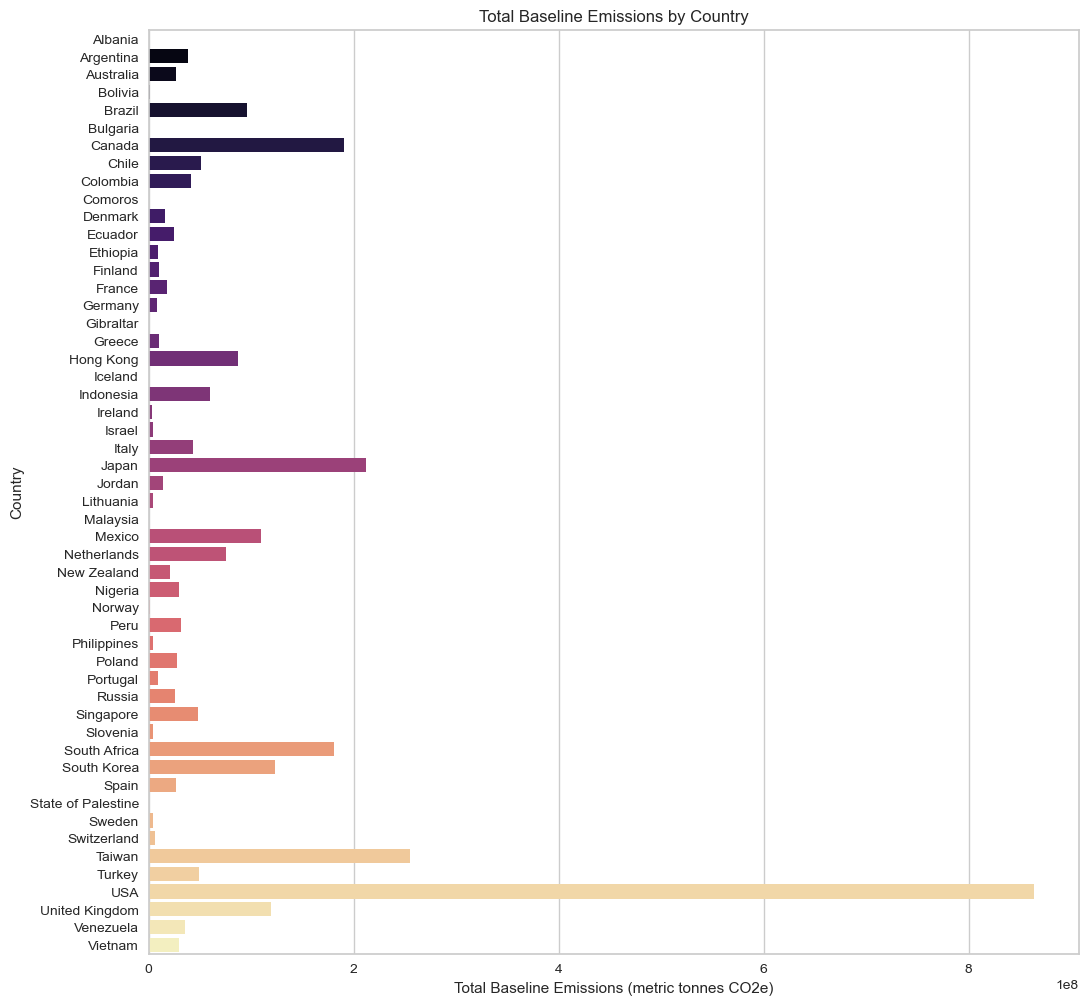

In [43]:
# Group by country and sum total emissions
country_emissions = combined_df.groupby('Country')['Total emissions (metric tonnes CO2e)'].sum().reset_index()

plt.figure(figsize=(12, 12))
sns.barplot(x='Total emissions (metric tonnes CO2e)', y='Country', data=country_emissions, palette='magma')
plt.title('Total Baseline Emissions by Country')
plt.xlabel('Total Baseline Emissions (metric tonnes CO2e)')
plt.ylabel('Country')
plt.show()

In [44]:
# Filter data for 2016 and 2017
filtered_df = combined_df[combined_df['Reporting year'].isin([2016, 2017])]

# Group by Country and Reporting Year
country_year_emissions = filtered_df.groupby(['Country', 'Reporting year'])['Total emissions (metric tonnes CO2e)'].sum().reset_index()

# Create a pivot table with 'Country' as index, 'Reporting year' as columns, and 'Total emissions' as values
emissions_pivot = country_year_emissions.pivot(
    index='Country',
    columns='Reporting year',
    values='Total emissions (metric tonnes CO2e)'
)

# Get total emissions for each country across both years
total_emissions = country_year_emissions.groupby('Country')['Total emissions (metric tonnes CO2e)'].sum().reset_index()



posx and posy should be finite values
posx and posy should be finite values


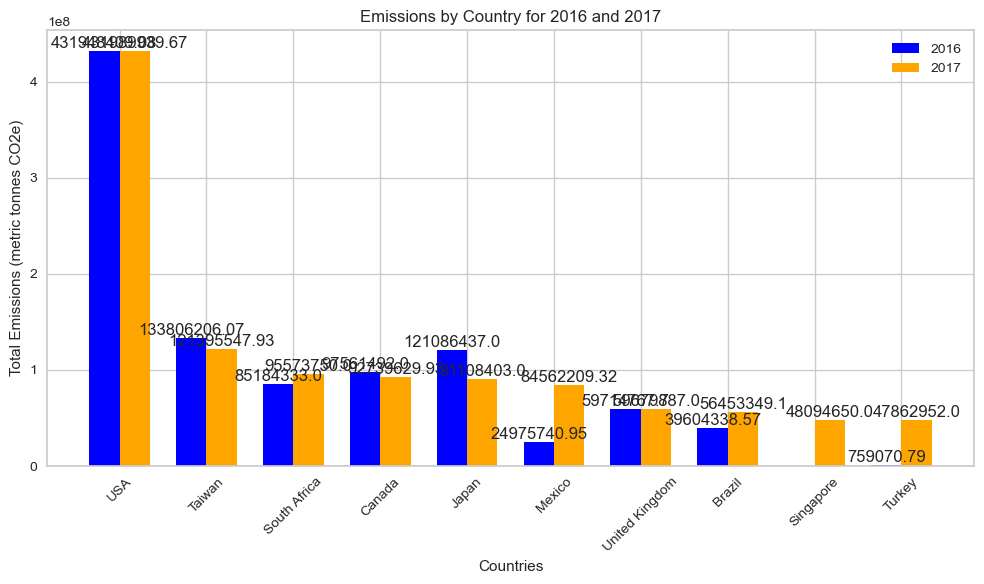

In [45]:
# Select the top 10 countries based on emissions in 2017 (or any other criterion)
top_countries = emissions_pivot.sort_values(by=2017, ascending=False).head(10)

# Set up the bar plot
plt.figure(figsize=(10, 6))

# Create the bar positions
bar_width = 0.35
x = range(len(top_countries))

# Create bars for 2016 and 2017
bars_2016 = plt.bar([p - bar_width/2 for p in x], top_countries[2016], width=bar_width, label='2016', color='blue')
bars_2017 = plt.bar([p + bar_width/2 for p in x], top_countries[2017], width=bar_width, label='2017', color='orange')

# Adding titles and labels
plt.title("Emissions by Country for 2016 and 2017")
plt.xlabel("Countries")
plt.ylabel("Total Emissions (metric tonnes CO2e)")
plt.xticks(x, top_countries.index, rotation=45)
plt.legend()

# Adding value labels on top of the bars
for bar in bars_2016 + bars_2017:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom' if yval > 0 else 'top')

plt.tight_layout()
plt.show()


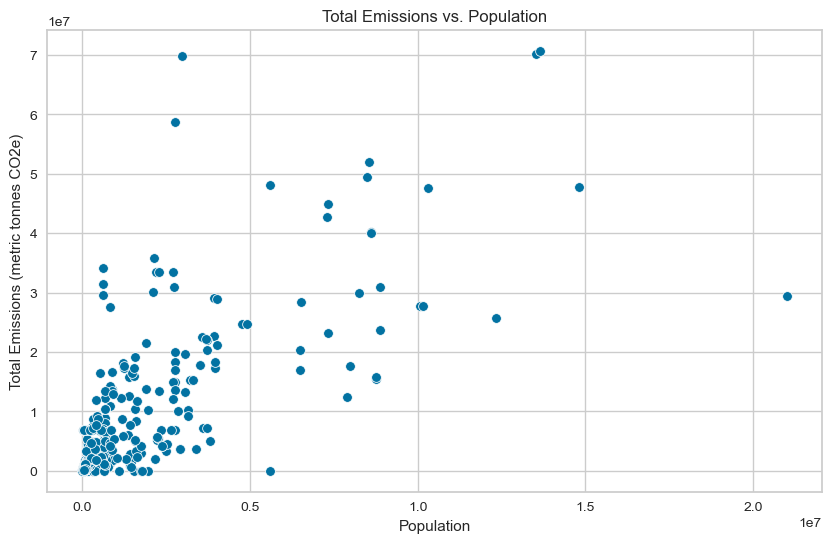

In [46]:
# Scatter plot of Total emissions vs. Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Population', y='Total emissions (metric tonnes CO2e)')
plt.title('Total Emissions vs. Population')
plt.xlabel('Population')
plt.ylabel('Total Emissions (metric tonnes CO2e)')
plt.show()

In [47]:
unique_methodologies = combined_df['Primary Methodology'].unique()
unique = df1['Primary Methodology'].unique()

print(unique)

['2006 IPCC Guidelines for National Greenhouse Gas Inventories'
 'Global Protocol for Community-Scale Greenhouse Gas Emissions Inventories (GPC), (WRI, C40 and ICLEI)'
 'U.S. Community Protocol for Accounting and Reporting of Greenhouse Gas Emissions (ICLEI)'
 'International Emissions Analysis Protocol (ICLEI)' 'Other']


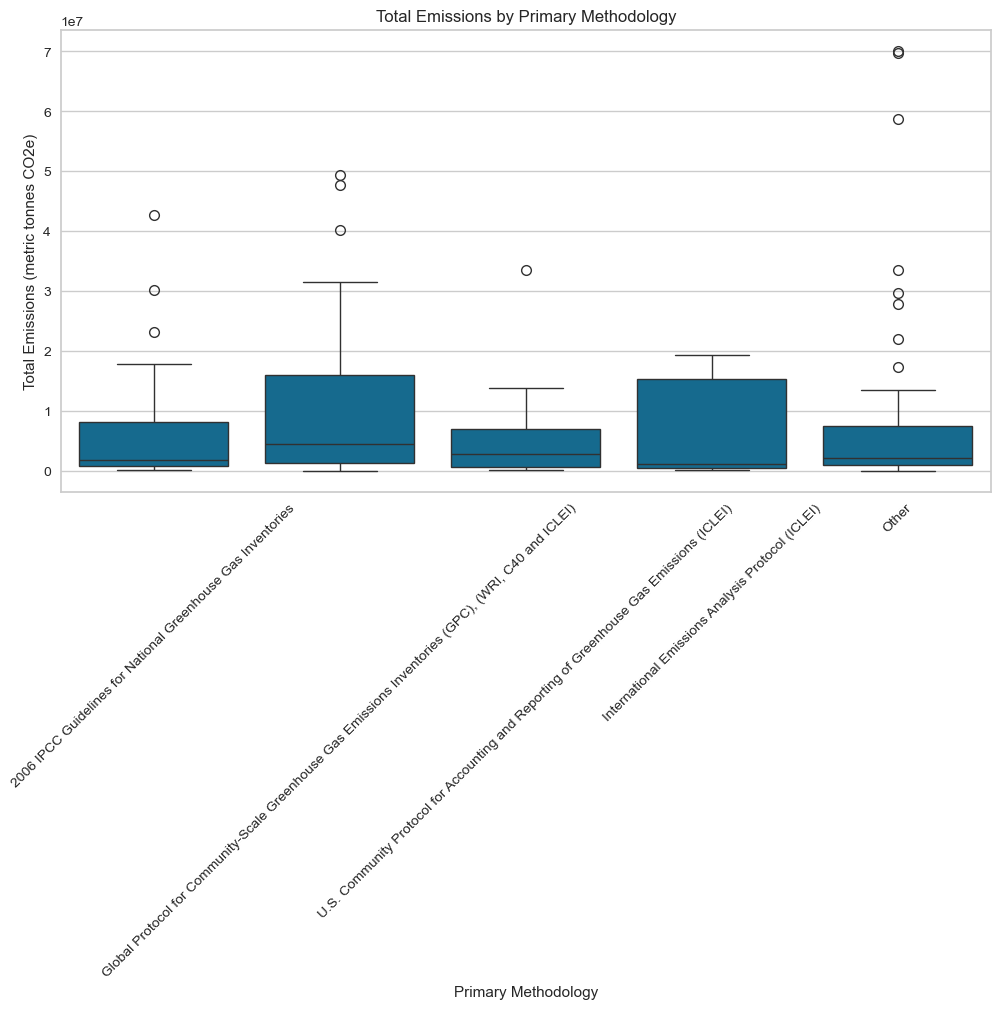

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x='Primary Methodology', y='Total emissions (metric tonnes CO2e)')
plt.title('Total Emissions by Primary Methodology')
plt.xticks(rotation=45)
plt.ylabel('Total Emissions (metric tonnes CO2e)')
plt.show()


he Global Protocol for Community-Scale Greenhouse Gas Emissions Inventories (GPC), developed by WRI, C40, and ICLEI, is utilized by various countries to standardize and enhance their greenhouse gas emissions reporting at the community level. The countries that align best with this methodology, as indicated by the box plot, reflect its effectiveness in capturing and managing local emissions data.

In [50]:
combined_df.describe()

,Reporting year,Total emissions (metric tonnes CO2e),Total Scope 1 Emissions (metric tonnes CO2e),Total Scope 2 Emissions (metric tonnes CO2e),Population,GDP,Average annual temperature (in Celsius),Land area (in square km),Average altitude (m)
count,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,416.000000,416.000000,416.000000
mean,2016.550481,7.336251e+06,1.559011e+08,5.228215e+07,1.364982e+06,4.766295e+12,15.150433,4367.748711,342.247634
std,0.498044,1.137040e+07,1.855253e+09,7.038956e+08,2.472612e+06,2.259351e+13,6.308209,42365.659644,552.416954
min,2016.000000,1.547000e+01,2.127000e+01,6.790000e+00,2.160000e+02,2.000000e+00,2.000000,2.300000,-5.000000
25%,2016.000000,7.199525e+05,8.058475e+05,4.218790e+05,1.193635e+05,6.242250e+09,10.650000,91.000000,26.750000
50%,2017.000000,2.489904e+06,4.250598e+06,3.008905e+06,4.175035e+05,9.319898e+10,14.811864,272.000000,129.000000
75%,2017.000000,7.811555e+06,1.122330e+07,6.804654e+06,1.466881e+06,3.147081e+12,18.400000,792.500000,341.595238
max,2017.000000,7.073340e+07,3.704683e+10,1.435430e+10,2.100000e+07,3.276022e+14,52.000000,692819.000000,3200.000000


### using one label encoding we will convert the catogorcial values for further anyalse 

In [52]:
data_column_category = combined_df.select_dtypes(exclude=[np.number])

label_encoder = LabelEncoder()

for i in data_column_category:

    combined_df[i] = label_encoder.fit_transform(combined_df[i])

print("Label Encoded Data: ")

combined_df.head()

Label Encoded Data: 


,City,Country,Reporting year,Primary Methodology,C40,Total emissions (metric tonnes CO2e),Total Scope 1 Emissions (metric tonnes CO2e),Total Scope 2 Emissions (metric tonnes CO2e),Population,GDP,Average annual temperature (in Celsius),Land area (in square km),Average altitude (m)
0,385,6,2016,0,1,13722942.0,1.363433e+07,8.861100e+04,1886481.0,1.201180e+11,6.8,500.0,17.0
1,214,49,2016,1,1,14889318.0,3.396055e+08,5.302028e+06,2762000.0,8.777300e+10,9.5,1277.0,250.0
2,134,48,2016,1,1,4437665.0,3.396055e+08,1.126221e+08,236995.0,1.000000e+10,10.4,288.0,1373.0
3,119,48,2016,4,1,4794708.0,2.890572e+06,1.904136e+06,407207.0,2.357000e+11,7.9,139.8,264.0
4,116,6,2016,2,1,3070000.0,2.771000e+06,2.990000e+05,375000.0,1.540000e+10,7.9,421.0,251.0


array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Reporting year'}>,
        <Axes: title={'center': 'Primary Methodology'}>],
       [<Axes: title={'center': 'C40'}>,
        <Axes: title={'center': 'Total emissions (metric tonnes CO2e)'}>,
        <Axes: title={'center': 'Total Scope 1 Emissions (metric tonnes CO2e)'}>,
        <Axes: title={'center': 'Total Scope 2 Emissions (metric tonnes CO2e)'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Average annual temperature (in Celsius)'}>,
        <Axes: title={'center': 'Land area (in square km)'}>],
       [<Axes: title={'center': 'Average altitude (m)'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

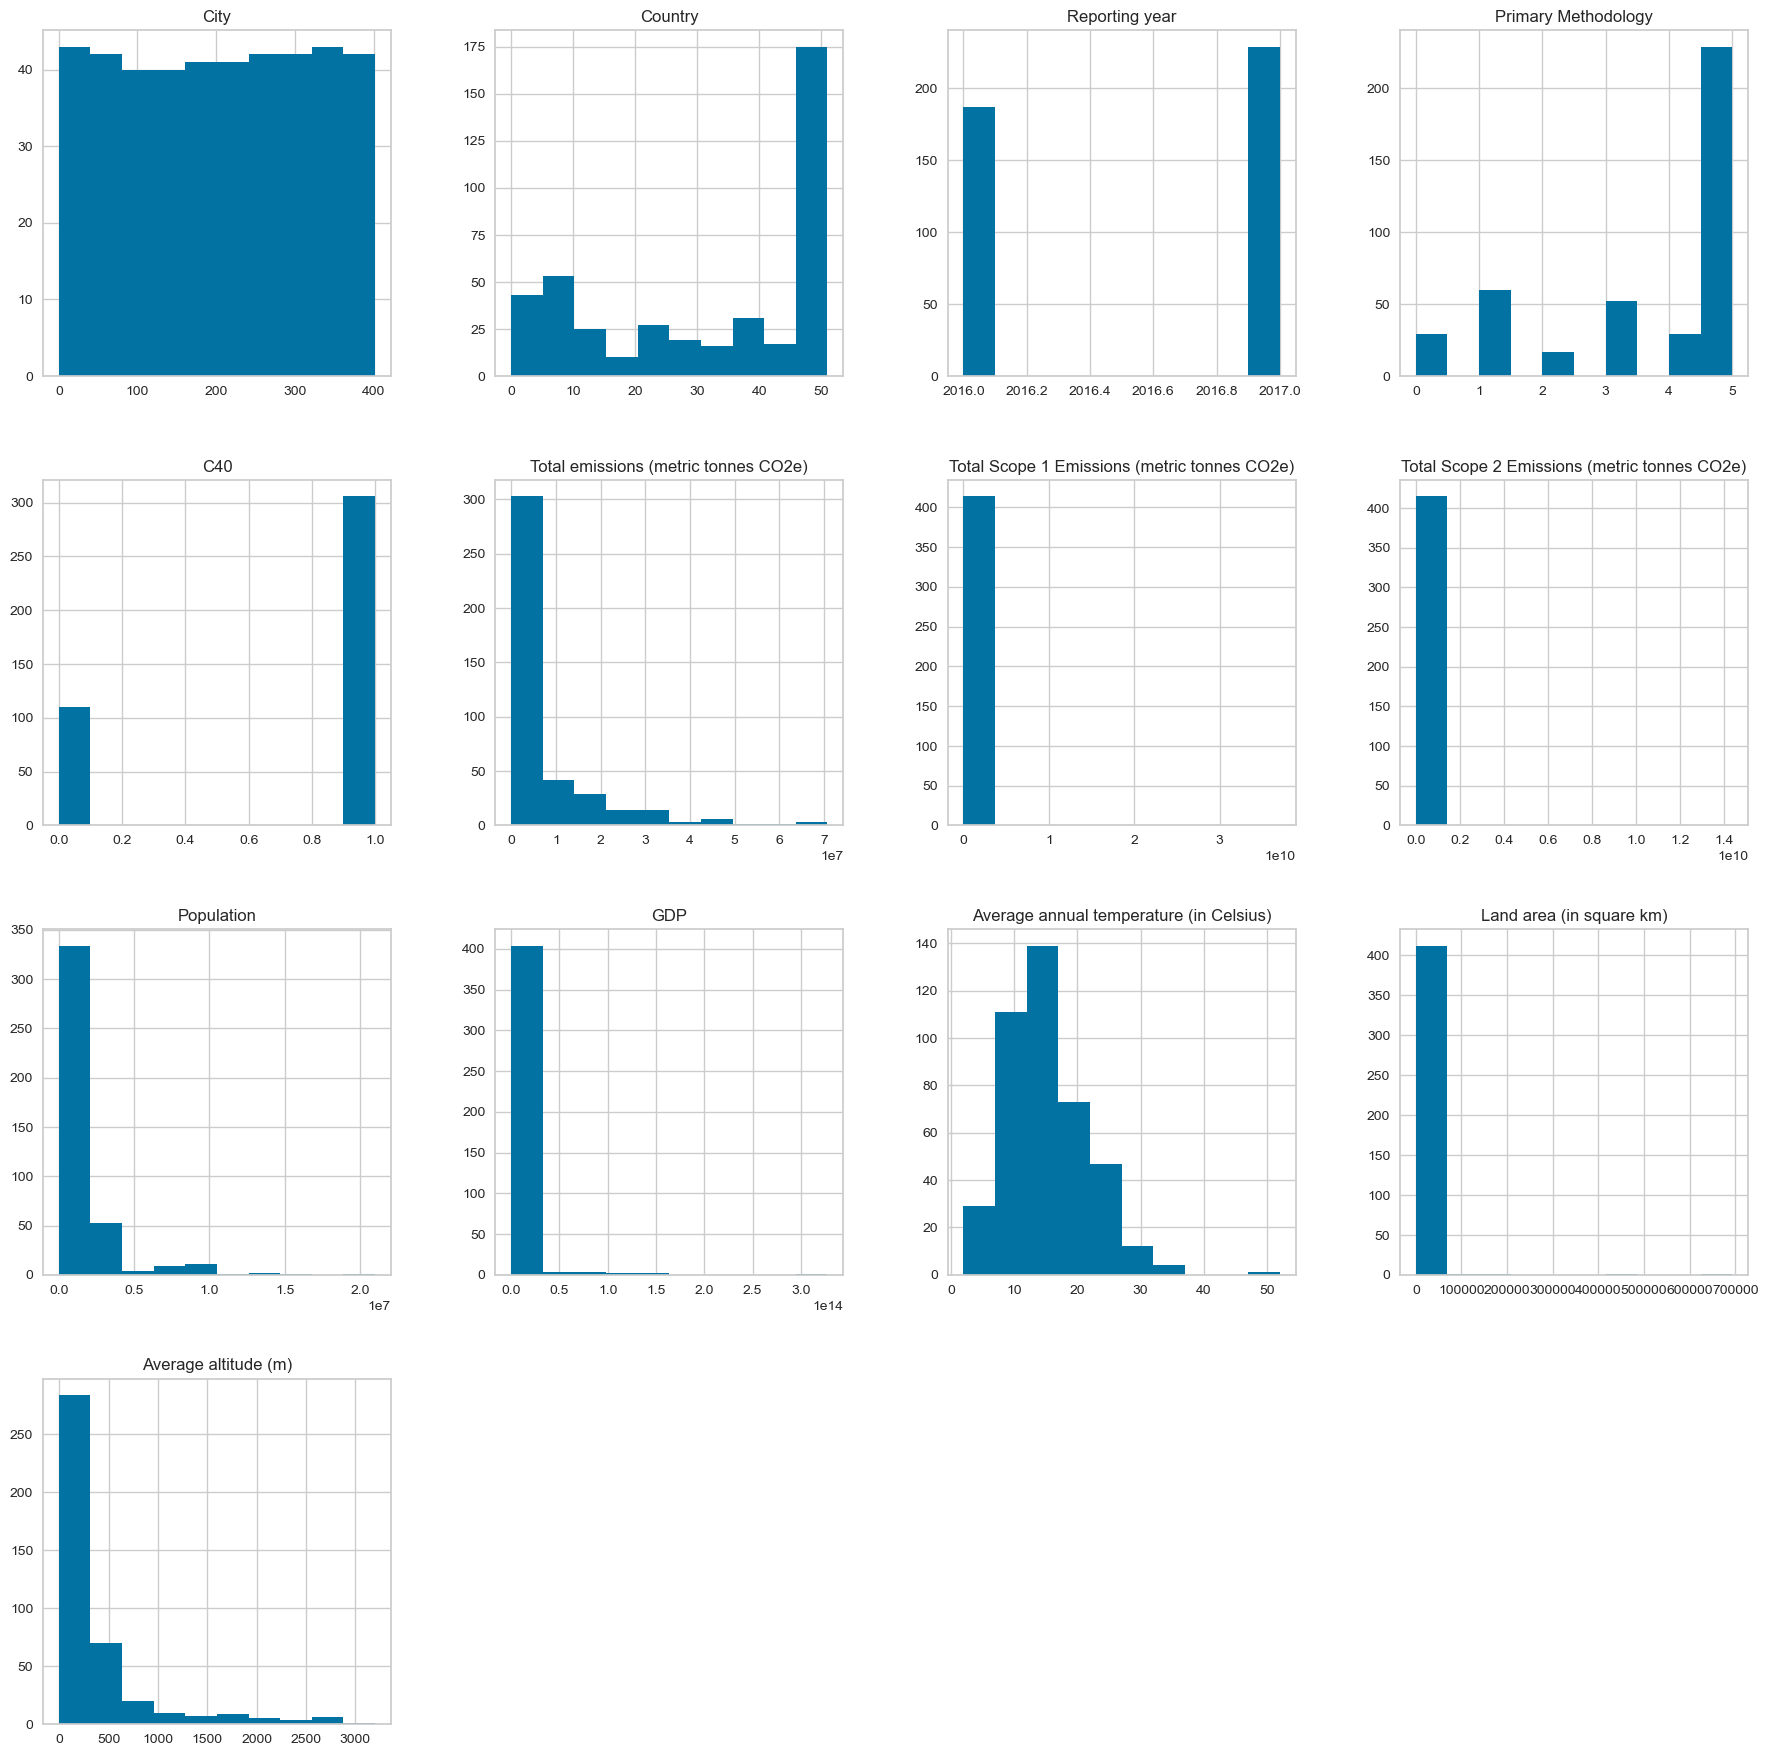

In [53]:
combined_df.hist(figsize=(22, 22))


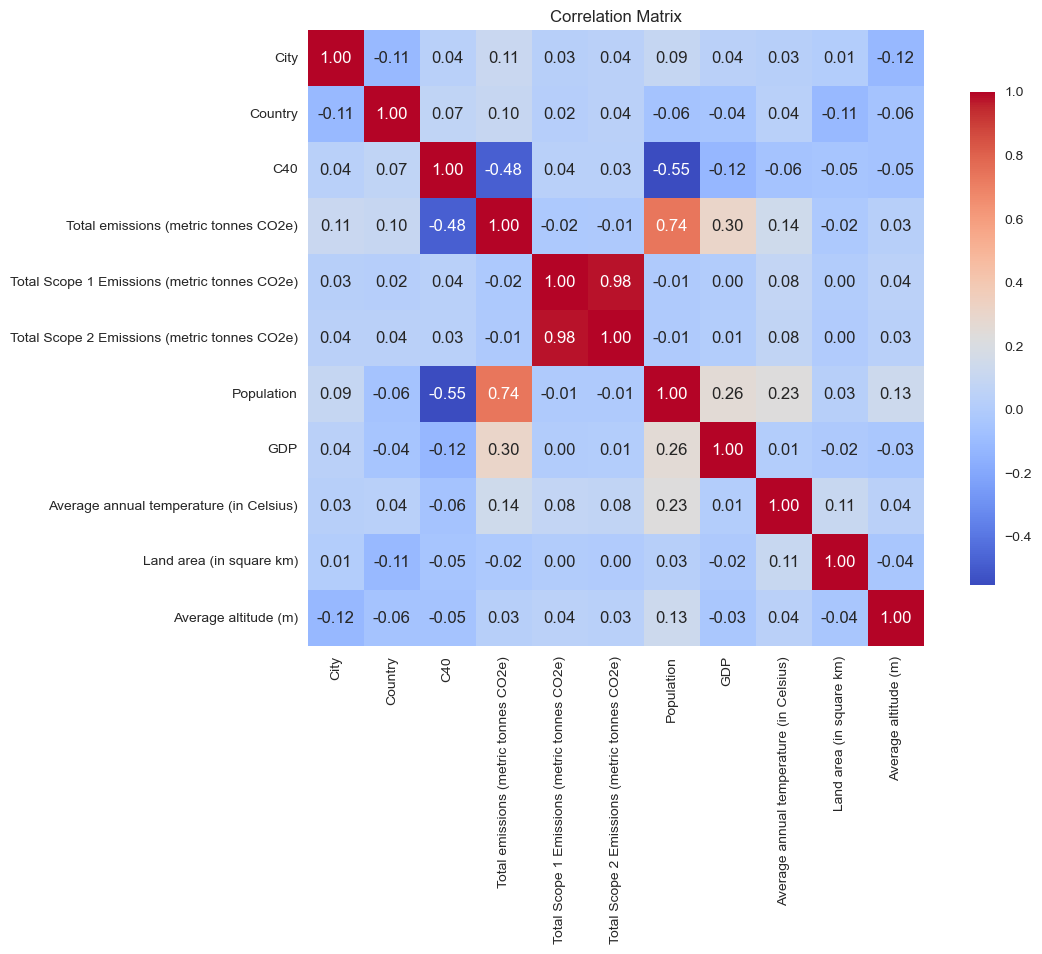

In [54]:
# Drop the specified columns
columns_to_exclude = ['Primary Methodology', 'Reporting year']
filtered_df = combined_df.drop(columns=columns_to_exclude)

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = filtered_df.corr()

plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix')
plt.show()


### The analysis shows a strong link between Total Scope 1 and Total Scope 2 Emissions. Population size is a key factor affecting total emissions, highlighting its importance in understanding human impact on the environment. While GDP and temperature also relate to emissions, their effects are weaker, indicating more complex interactions. Additionally, the C40 feature has a negative correlation of -0.55 with population, suggesting that cities in the C40 initiative may have lower emissions relative to their size. This points to the effectiveness of urban climate strategies in reducing emissions.

In [56]:
# we are listin 2 features that correlate most with each other 
corr_values = correlation_matrix.abs().unstack()

corr_values = corr_values[corr_values < 1]

# Sort the correlations in descending order
sorted_corr = corr_values.sort_values(ascending=False)

# Display the top correlations
top_correlations = sorted_corr.head(10)  # You can adjust the number as needed
print(top_correlations)

Total Scope 1 Emissions (metric tonnes CO2e)  Total Scope 2 Emissions (metric tonnes CO2e)    0.979754
Total Scope 2 Emissions (metric tonnes CO2e)  Total Scope 1 Emissions (metric tonnes CO2e)    0.979754
Population                                    Total emissions (metric tonnes CO2e)            0.738219
Total emissions (metric tonnes CO2e)          Population                                      0.738219
C40                                           Population                                      0.550451
Population                                    C40                                             0.550451
Total emissions (metric tonnes CO2e)          C40                                             0.481291
C40                                           Total emissions (metric tonnes CO2e)            0.481291
Total emissions (metric tonnes CO2e)          GDP                                             0.304934
GDP                                           Total emissions (metric ton

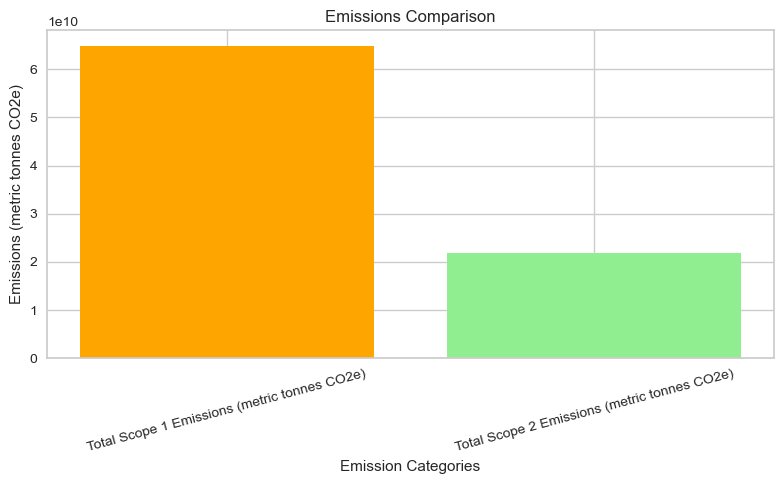

In [57]:
# Define the categories for the bar chart
categories = [
    'Total Scope 1 Emissions (metric tonnes CO2e)', 
    'Total Scope 2 Emissions (metric tonnes CO2e)'
]

# Replace these with actual values from your DataFrame
total_scope_1_emissions = combined_df['Total Scope 1 Emissions (metric tonnes CO2e)'].sum()
total_scope_2_emissions = combined_df['Total Scope 2 Emissions (metric tonnes CO2e)'].sum()

# Define the values for the bar chart (only Scope 1 and Scope 2)
values = [total_scope_1_emissions, total_scope_2_emissions]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['orange', 'lightgreen'])
plt.title('Emissions Comparison')
plt.ylabel('Emissions (metric tonnes CO2e)')
plt.xlabel('Emission Categories')
plt.xticks(rotation=15)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


### This bar indicates that the total emissions from Scope 1, which come directly from greenhouse gas emissions and controlled sources, contribute to higher total emissions per city.

In [59]:





# Calculate emissions per capita
combined_df['Emissions per Capita'] = combined_df['Total emissions (metric tonnes CO2e)'] / combined_df['Population']




In [60]:
combined_df

,City,Country,Reporting year,Primary Methodology,C40,Total emissions (metric tonnes CO2e),Total Scope 1 Emissions (metric tonnes CO2e),Total Scope 2 Emissions (metric tonnes CO2e),Population,GDP,Average annual temperature (in Celsius),Land area (in square km),Average altitude (m),Emissions per Capita
0,385,6,2016,0,1,13722942.0,1.363433e+07,8.861100e+04,1886481.0,1.201180e+11,6.8,500.0,17.0,7.274360
1,214,49,2016,1,1,14889318.0,3.396055e+08,5.302028e+06,2762000.0,8.777300e+10,9.5,1277.0,250.0,5.390774
2,134,48,2016,1,1,4437665.0,3.396055e+08,1.126221e+08,236995.0,1.000000e+10,10.4,288.0,1373.0,18.724720
3,119,48,2016,4,1,4794708.0,2.890572e+06,1.904136e+06,407207.0,2.357000e+11,7.9,139.8,264.0,11.774621
4,116,6,2016,2,1,3070000.0,2.771000e+06,2.990000e+05,375000.0,1.540000e+10,7.9,421.0,251.0,8.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,373,36,2017,5,1,275646.0,5.889212e+06,3.008905e+06,79465.0,3.147081e+12,15.0,407.0,75.0,3.468772
412,196,4,2017,5,1,131931.0,1.157197e+05,1.620119e+04,33729.0,4.676285e+09,17.7,243.1,973.0,3.911500
413,12,29,2017,5,0,4138000.0,5.889212e+06,2.460000e+06,834713.0,6.450000e+10,10.9,219.0,2.0,4.957393
414,298,48,2017,5,1,153948.0,1.539480e+05,3.008905e+06,66478.0,3.147081e+12,15.0,67.0,7.0,2.315774


# Clustering

In [62]:
columns_to_scale = ['Country','Total emissions (metric tonnes CO2e)', 
                    'Population','GDP',
                    'Average annual temperature (in Celsius)', 
                ]

In [63]:
scaled_df = combined_df[columns_to_scale].copy()


In [64]:
scaler = MinMaxScaler()
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])


In [65]:
X = scaled_df


In [66]:
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values


Series([], dtype: int64)


In [67]:
mean_population = X['Population'].mean()
X.loc[:, 'Population'] = X['Population'].fillna(mean_population)


In [68]:
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [0.2322761102183478, 0.20240336662301522, 0.17603494949372006, 0.16367720240887051, 0.1531702752608742, 0.1498540784814241, 0.1364962961572684, 0.13321488571878]


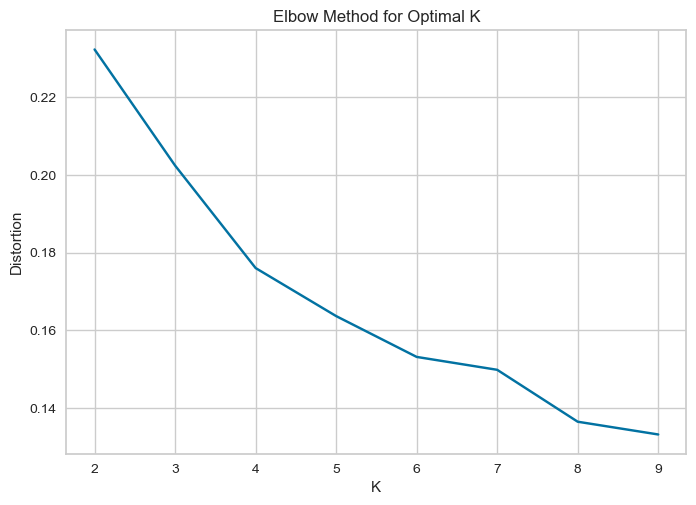

In [69]:
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [70]:
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.5442954863669032

Number of clusters = 3
Silhouette score = 0.5443609109371017

Number of clusters = 4
Silhouette score = 0.45199944409380843

Number of clusters = 5
Silhouette score = 0.4495059078351356

Number of clusters = 6
Silhouette score = 0.4155279249447108

Number of clusters = 7
Silhouette score = 0.4246140661157459

Number of clusters = 8
Silhouette score = 0.43716180707422503

Number of clusters = 9
Silhouette score = 0.3980601218835754


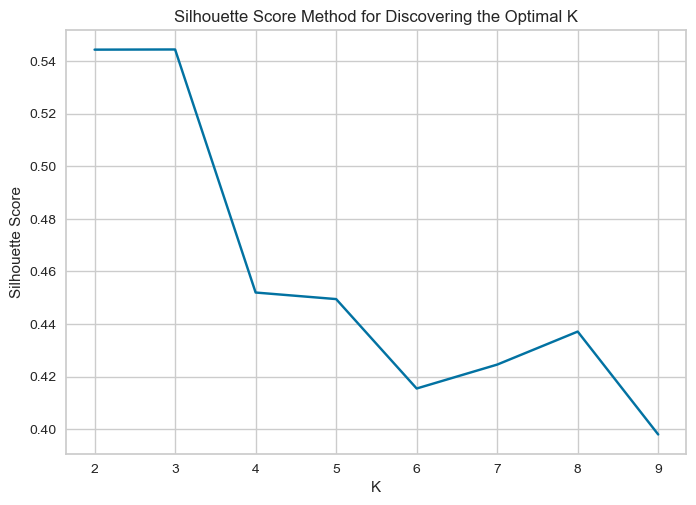

In [71]:
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

we can see that 3 cluster would fit best

In [73]:
num_clusters = 2

In [74]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init="auto")


In [75]:
kmeans.fit(X)


KMeans(n_clusters=2)

In [76]:
np.set_printoptions(threshold=np.inf)
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


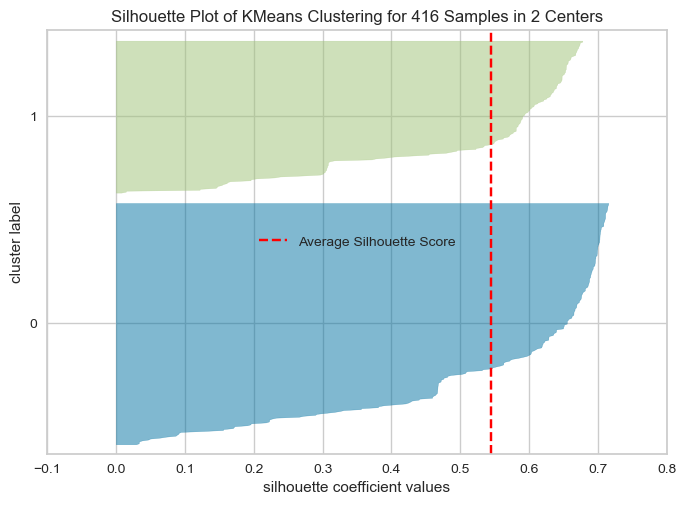

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 416 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [77]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

#### they are not very equal in size

### i will validate my model

In [80]:
new_country = 6  # Example country identifier
new_data = pd.DataFrame({
    'Country': [2.0],
    'Total emissions (metric tonnes CO2e)': [250],
    'Population': [25],
    'GDP': [2500],
    'Average annual temperature (in Celsius)': [19]
})

# Scale the new data
scaled_new_data = scaler.transform(new_data)

# Predict the cluster for the new data
new_cluster = kmeans.predict(scaled_new_data)
print(f"Predicted cluster for Country {new_country}: {new_cluster[0]}")

Predicted cluster for Country 6: 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Linear Regression

Before we start our linear, multiple and polynormial regression, we need to do some addtional engineering. We have used standardization because the variables 'Total emissions (metric tonnes CO2e)' and 'Population' and the other columns have very different scales. Standardization ensures that all the features have the same scale, making the regression more accurate and preventing features with larger ranges from dominating the model's predictions.

In [83]:
#  Selecting the required columns for scaling
columns_to_scale = [
    'Total emissions (metric tonnes CO2e)', 
    'Total Scope 1 Emissions (metric tonnes CO2e)', 
    'Total Scope 2 Emissions (metric tonnes CO2e)', 
    'Population', 
    'GDP', 
    'Average annual temperature (in Celsius)',
    'Land area (in square km)'
]

# Create a copy of the original dataset with only the selected columns
scaled_df = combined_df[columns_to_scale].copy()

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(scaled_df)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

# Display the first few rows of the scaled dataset
scaled_df.head()

,Total emissions (metric tonnes CO2e),Total Scope 1 Emissions (metric tonnes CO2e),Total Scope 2 Emissions (metric tonnes CO2e),Population,GDP,Average annual temperature (in Celsius),Land area (in square km)
0,0.562371,-0.076776,-0.074239,0.211164,-0.205890,-1.325335,-0.091404
1,0.665074,0.099138,-0.066823,0.565677,-0.207323,-0.896805,-0.073042
2,-0.255231,0.099138,0.085826,-0.456742,-0.210770,-0.753962,-0.096414
3,-0.223792,-0.082574,-0.071656,-0.387820,-0.200768,-1.150749,-0.099917
4,-0.375658,-0.082638,-0.073940,-0.400861,-0.210530,-1.150749,-0.093271


1. We will shuffle the data

In [85]:
scaled_df_shuffled = shuffle(scaled_df, random_state=42)

2. Now we are creating the dependent and independent variabels

In [87]:
# DV = 'Total emissions (metric tonnes CO2e)'
# IV = 'Population'
X = scaled_df[['Population']]  # Independent variable
y = scaled_df['Total emissions (metric tonnes CO2e)']  # Dependent variable

3. Next we are splitting the data into training and test sets(80% training, 20% testing)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

5. Here we create and train the linear regression model

In [91]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Print Intercept, Coefficient and formula

In [93]:
feature_names = ['Population', 'GDP']
equation = ' + '.join(f'({coef:0.2f} x {name})' for coef, name in zip(model.coef_, feature_names))
print(f'Intercept: {model.intercept_:0.2f}\nCoefficients: {model.coef_}\nTotal Emissions = {model.intercept_:0.2f} + {equation}')

Intercept: 0.00
Coefficients: [0.85097468]
Total Emissions = 0.00 + (0.85 x Population)


7. Here we will try our model

In [95]:
y_predictions = model.predict(X_test)

8. Plotting the correlation of predicted and actual values in a scatterplot

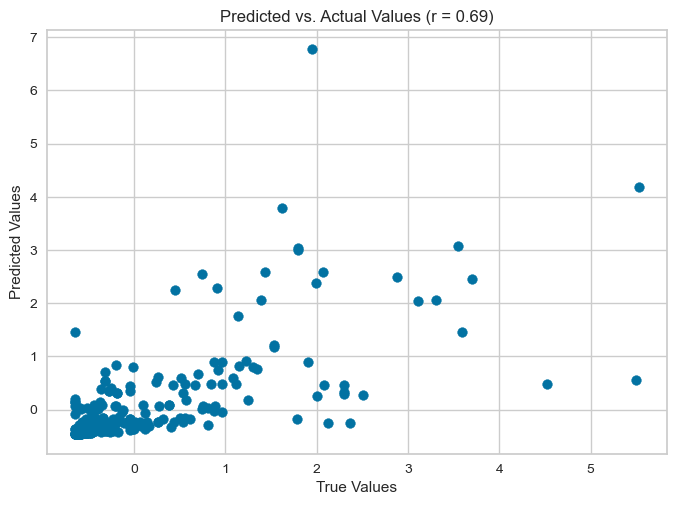

In [97]:
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, y_predictions)[0]))
plt.show()

Conclusion on the model: The model shows a moderate correlation between predicted and actual values (r = 0.71), suggesting that population explains some, but not all, of the variation in total emissions

9. Now we want to calculate the metrcis

In [100]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, y_predictions),
        metrics.mean_squared_error(y_test, y_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, y_predictions)),
        metrics.r2_score(y_test, y_predictions)
    ]
}).round(3)

10. Finally we want to display the metrics

In [102]:
metrics_df

,Metric,Value
0,MAE,0.393
1,MSE,0.511
2,RMSE,0.715
3,R-Squared,0.458


The model shows 45% accuracy, with an R-squared value of 0.456, indicating it explains approximately 45% of the variance in total emissions. while the MAE of 0.393 suggests a moderate level of error in the predictions

# Multiple Regression¶

1. First We will shuffle the data

In [364]:
df_shuffled = shuffle(scaled_df, random_state=42)

2. Now we are creating the dependent and independent variabels

In [367]:
X = scaled_df[['Population', 'GDP']]  # Independent variables
y = scaled_df['Total emissions (metric tonnes CO2e)']  # Dependent variable

3. We have to do some addtional engineering. We have some NaN values in the X, here we will replace the NaN values with the median.

In [370]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

4. Next we are splitting the data into training and test sets(80% training, 20% testing)

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.20, random_state=42)

In [375]:
# **Scaling Consistency**: Fit the scaler only on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Here we create and train the linear regression model

In [378]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

6. Print Intercept, Coefficient and formula

In [381]:
feature_names = ['Population', 'GDP']
equation = ' + '.join(f'({coef:0.2f} x {name})' for coef, name in zip(model.coef_, feature_names))
print(f'Intercept: {model.intercept_:0.2f}\nCoefficients: {model.coef_}\nTotal Emissions = {model.intercept_:0.2f} + {equation}')

Intercept: -0.01
Coefficients: [0.75344018 0.12292735]
Total Emissions = -0.01 + (0.75 x Population) + (0.12 x GDP)


Here We can conclude that for every unit increase in Population, Total Emissions increase by approximately 0.79, and for every unit increase in GDP, Total Emissions increase by approximately 0.11, with Population having a stronger impact on emissions than GDP

7. Here we will try our model

In [385]:
y_predictions = model.predict(X_test_scaled)

8. Plotting the correlation of predicted and actual values in a scatterplot

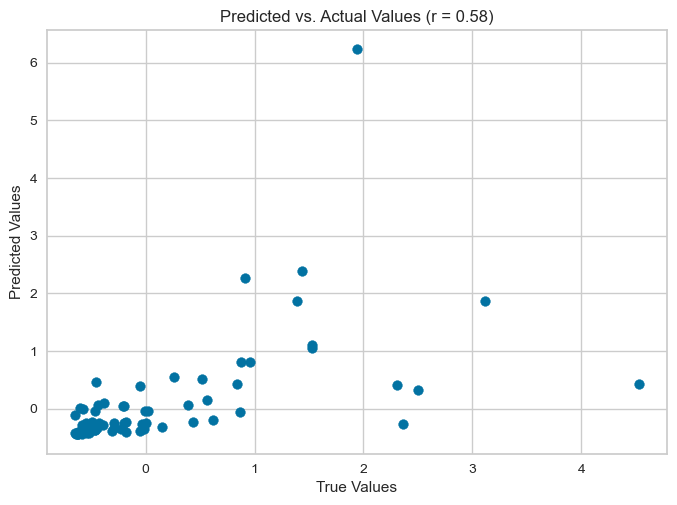

In [388]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, y_predictions)[0]))
plt.show()

The model shows a moderate positive correlation (r = 0.58) between predicted and actual values, suggesting the predictions are somewhat aligned with the true emissions, but the model still lacks high precision.

9. Now we want to calculate the metrcis

In [399]:
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [
        metrics.mean_absolute_error(y_test, y_predictions),
        metrics.mean_squared_error(y_test, y_predictions),
        np.sqrt(metrics.mean_squared_error(y_test, y_predictions)),
        metrics.r2_score(y_test, y_predictions)
    ]
}).round(3)

10. Finally we want to display the metrics

In [402]:
metrics_df

,Metric,Value
0,MAE,0.458
1,MSE,0.746
2,RMSE,0.864
3,R-Squared,0.213


We can now conlcude that the model has an accuracy of 21.3%, indicating a weak fit between the predicted and actual emissions

# Polynominal Regression

1. First We will shuffle the data

In [433]:
scaled_df_shuffled = shuffle(scaled_df, random_state=42)

2. Now we are creating the dependent and independent variabels

In [436]:
X = scaled_df_shuffled[['Population']]  # Independent variables
y = scaled_df_shuffled['Total emissions (metric tonnes CO2e)']  # Dependent variable

3. We have to do some addtional engineering. We have some NaN values in the X, here we will replace the NaN values with the median.

In [439]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)  # Impute missing values in X

4. Next we are splitting the data into training and test sets(80% training, 20% testing)

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.20, random_state=42)

5. Now I feature scale my data

In [445]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

6. Here we are applying Polynomial Features (degree=2)

In [448]:
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

7. Here we create and Train the Polynomial Regression model

In [451]:
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

LinearRegression()

8. Here we will try our model

In [454]:
y_predict = pol_reg.predict(X_test_poly)

9. Visualize the results in a scatterplot

Here we can see that the polynomial regression model captures the general trend between true and predicted emissions, but significant deviations and outliers suggest potential overfitting, as the model may be too complex, fitting the noise rather than the underlying pattern, resulting in limited accuracy

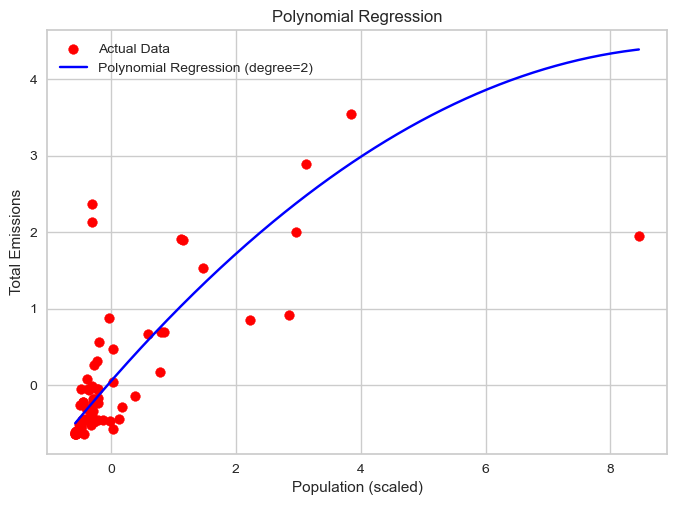

In [458]:
def viz_polynomial():
    # Check if X_test_scaled is 2D and flatten it if necessary
    if X_test_scaled.ndim > 1:
        X_test_scaled_flat = X_test_scaled.flatten()
    else:
        X_test_scaled_flat = X_test_scaled

    # Scatter plot of actual data points
    plt.scatter(X_test_scaled_flat, y_test, color='red', label='Actual Data')
    
    # Generate a smooth range of values for X (Population) for plotting the curve
    X_sequence = np.linspace(X_test_scaled.min(), X_test_scaled.max(), 300).reshape(-1, 1)
    X_sequence_poly = poly.transform(X_sequence)  # Transform sequence with polynomial features
    
    # Predict on this sequence of values to get the smooth curve
    y_sequence_pred = pol_reg.predict(X_sequence_poly)
    
    # Plot the polynomial regression line
    plt.plot(X_sequence, y_sequence_pred, color='blue', label=f'Polynomial Regression (degree={degree})')
    plt.title('Polynomial Regression')
    plt.xlabel('Population (scaled)')
    plt.ylabel('Total Emissions')
    plt.legend()
    plt.show()

# Call the visualization function
viz_polynomial()


In [460]:
metrics_dict = {
    'MAE': metrics.mean_absolute_error(y_test, y_predict),
    'MSE': metrics.mean_squared_error(y_test, y_predict),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_predict)),
    'R-Squared': metrics.r2_score(y_test, y_predict)
}

11. Display metrics

In [463]:
metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value']).round(3)
print(metrics_df)

      Metric  Value
0        MAE  0.340
1        MSE  0.347
2       RMSE  0.589
3  R-Squared  0.567


Conclusion: The seemingly good performance, indicated by the R-squared value, may be misleading due to potential overfitting. While the model fits the training data well, it risks failing to generalize to new data, as it might be capturing noise and outliers rather than the true underlying trend

In [152]:
accuracy = metrics_dict['R-Squared'] * 100
print(f"The model's accuracy is approximately {accuracy:.2f}%.")

The model's accuracy is approximately 56.72%.


the accuracy is 56% but it is overfitting, that's why we cant use it for our prediction

The predictions from the three models do not fit particularly well, and their accuracy remains relatively low. To address this, we will employ our linear regression model, which currently has an accuracy of 45 percent. Furthermore, we increased the sample size of X_test from 20 percent to 80 percent to improve the R-squared value and enhance overall predictive performance.